In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dython import nominal
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf


# Dataset desription

Reference: https://www.viethpham.com/productivity-garment-industry/
1. **Date**:
    - Date in MM-DD-YYYY; Contains duplicates. 
    - Range from 2015-01-01 to 2015-03-11, which is 59 days. Can drop
2. **quarter**:
    - A portion of the month. A month was divided into four quarters
    - Has 5 values. Quarter 1-5
3. **department**:
    - Associated department with the instance
    - Has 2 values. ‘sweing’ and ‘finishing’
4. **day**:
    - Day of the Week
    - Has 6 values. Friday does not appear. Dayoff?
5. **team**:
    - Associated team number with the instance
    - Has 12 values, for 12 teams
6. **targeted_productivity**:                     
    - Targeted productivity set by the Authority for each team for each day.
    - Has 9 unique values - range is 0.07 - 0.8. Very likely to have outliers
7. **smv**:             
   - Standard Minute Value, it is the allocated time for a task
   - Values range from 2.9 to 54.56
8. **wip**:                
    - Work in progress. Includes the number of unfinished items for products
    - Values range from 7 to 23122. Mistake? Extreme outliers
9. **over_time**:
    - Represents the amount of overtime by each team in minutes
    - Values range from 0 to 25920. Extreme outliers. The majority are 0, 960, 1440
10. **incentive**:
    -  	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
    - Values range from 0 to 3600. Extreme outliers. The majority is 0
11. **idle_time**:
    - The amount of time when the production was interrupted due to several reasons
    - Values range from 0 to 300. Extreme outliers. The majority is 0
12. **idle_men**: 
    - The number of workers who were idle due to production interruption
    - Values range from 0 to 45. The majority is 0
13. **no_of_style_change**: 
    - Number of changes in the style of a particular product
    - Only has 3 values - 0,1,2. The majority is 0
14. **no_of_workers**:
    - Number of workers in each team 
    - Ranges from 2 to 89. The majority is 8. There are some numbers that include decimals i.e. 51.5. Mistake?
15. **actual_productivity**: 
    - The actual % of productivity that was delivered by the workers. It ranges from 0-1
    - Values range from 0.2337 to 1.1204

## Dataset preprocessing and analysis

 Load the data

In [2]:
data_dir = './data/'

In [3]:
data_input = 'garments_worker_productivity.csv'

In [4]:
data_output = 'regression_data.csv'

In [5]:
data = pd.read_csv(data_dir+data_input)

In [6]:
categorical = ['date', 'quarter', 'department', 'day', 'team']

In [7]:
continuous = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

In [8]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


---------

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Missing values only in work in progress (wip) column. We need to check whether this means that there are no wips or the value is unknown. It seems that there are no 0 values in this column, therefore we may assume that empty values are 0.

In [10]:
data = data.fillna(0)

### Functions

In [37]:
def plot_bar_distribution(data, by_column, title='Bar Plot', title_size=25, axes_size=15, tick_size=12):
    fig, ax = plt.subplots(figsize=(10, 5))
    label = by_column
    split_data = data.groupby(by_column).agg(count=('date', 'count')).reset_index()
    ax.bar(x=split_data['team'], height=split_data['count'])
    plt.title(title + f' for {by_column} distribution', fontsize=title_size)
    plt.xlabel(by_column, fontsize=axes_size)
    plt.ylabel("Number of entries", fontsize=axes_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    plt.show()

In [11]:
# Idea taken from https://www.kaggle.com/ragnar123/very-fst-model
def reduce_mem_usage(data, verbose=True, cast_cat=False):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = data.memory_usage().sum() / 1024**2    
    for col in data.columns:
        col_type = data[col].dtypes
        if col_type in numerics:
            print('Reducing for {}'.format(col))
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        else:
            if cast_cat:
                data[col] = data[col].astype('category')
    end_mem = data.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return data


In [12]:
def plot_boxplot(data, by_column, title='Box Plot', title_size=25, axes_size=15, tick_size=12):
    fig, ax = plt.subplots(figsize=(10, 5))
    label = by_column
    split_data = data[by_column]
    ax.boxplot(split_data)
    ax.axhline(y=np.average(split_data), color='r', linestyle='-')
    plt.title(title, fontsize=title_size)
    plt.xlabel(by_column, fontsize=axes_size)
    plt.ylabel("Value", fontsize=axes_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    plt.show()

In [13]:
# Idea taken from https://www.kaggle.com/ragnar123/very-fst-model
def reduce_mem_usage(data, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = data.memory_usage().sum() / 1024**2    
    for col in data.columns:
        col_type = data[col].dtypes
        if col_type in numerics:
            print('Reducing for {}'.format(col))
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)

    end_mem = data.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return data


In [14]:
def autocor_plot(data, team, lag_days=20, title='Autocorrelation Plot', title_size=25, axes_size=15, tick_size=12, productivity="targeted_productivity"):
    data_t = data[data['team']==team].copy()
    fig = plot_acf(data_t[productivity], lags=lag_days)

    # setting titles
    fig.suptitle(title + ' for ' + productivity + ' in team ' + str(team), fontsize=title_size,  y=1.02)
    plt.ylabel("Correlation")
    plt.xlabel("Lag at k")
    plt.tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    plt.tick_params(axis='y', which='major', labelsize=tick_size)
    plt.tick_params(axis='x', which='major', labelsize=tick_size, labelrotation=90)
    plt.tick_params(axis='y', which='major', labelsize=tick_size)
    plt.show() 

### Implementation

In [15]:
data = reduce_mem_usage(data)

Reducing for team
Reducing for targeted_productivity
Reducing for smv
Reducing for wip
Reducing for over_time
Reducing for incentive
Reducing for idle_time
Reducing for idle_men
Reducing for no_of_style_change
Reducing for no_of_workers
Reducing for actual_productivity
Mem. usage decreased to  0.06 Mb (57.4% reduction)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int8   
 5   targeted_productivity  1197 non-null   float16
 6   smv                    1197 non-null   float16
 7   wip                    1197 non-null   float16
 8   over_time              1197 non-null   int16  
 9   incentive              1197 non-null   int16  
 10  idle_time              1197 non-null   float16
 11  idle_men               1197 non-null   int8   
 12  no_of_style_change     1197 non-null   int8   
 13  no_of_workers          1197 non-null   float16
 14  actual_productivity    1197 non-null   float16
dtypes: f

### Number of instances for each team

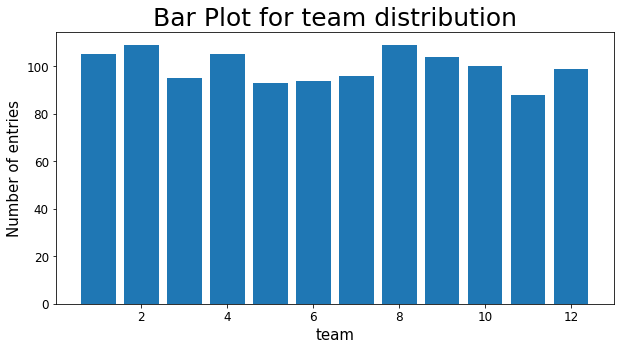

In [38]:
plot_bar_distribution(data, 'team')

#### Box Plots for each column

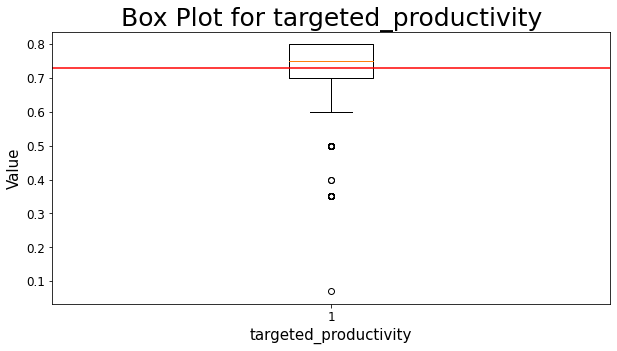

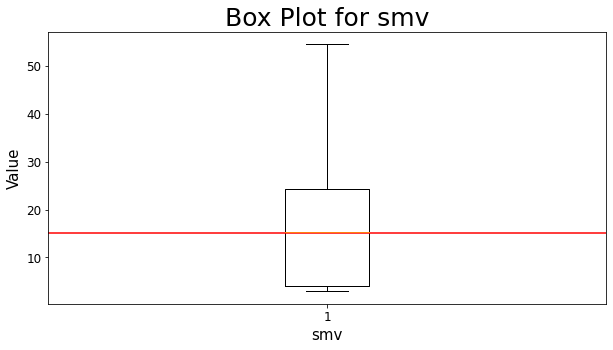

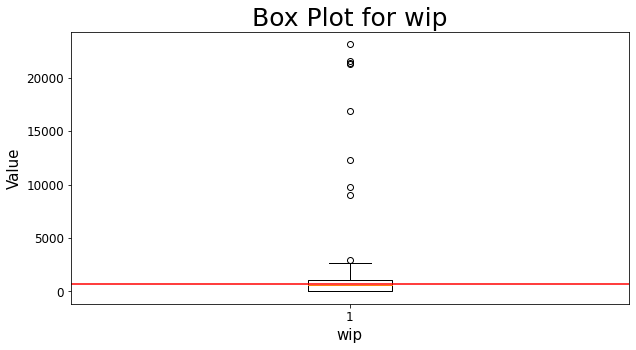

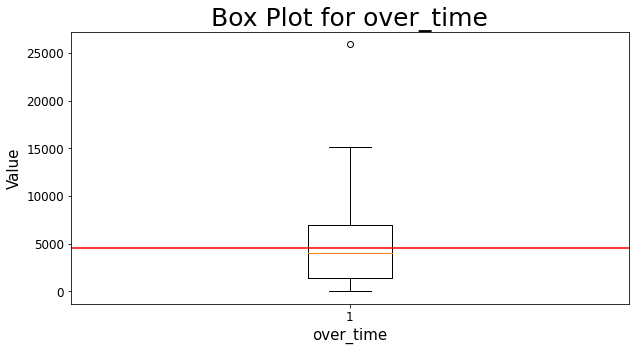

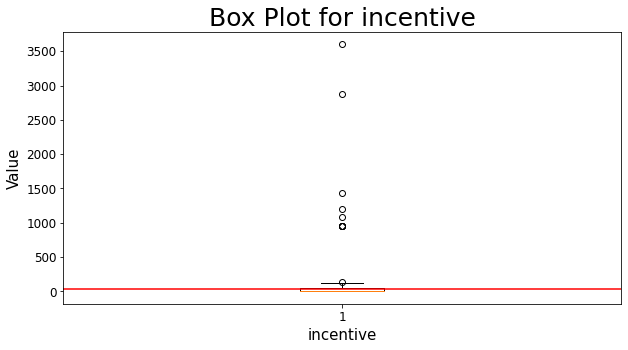

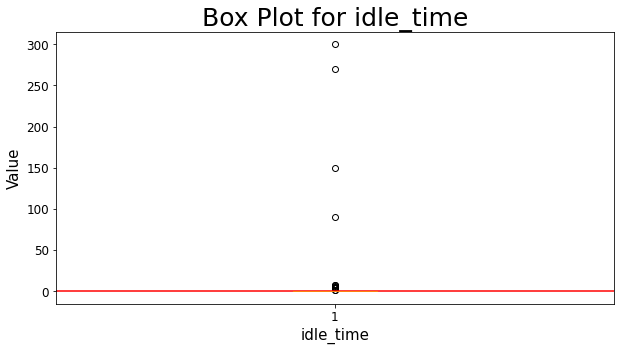

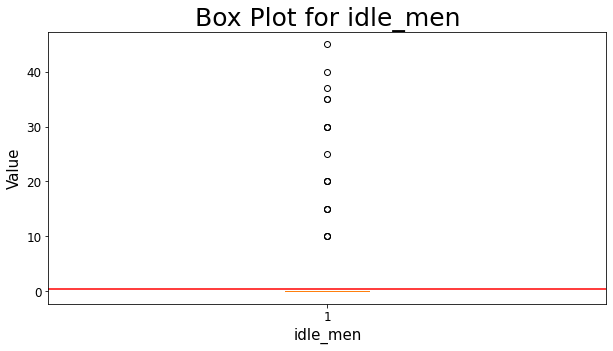

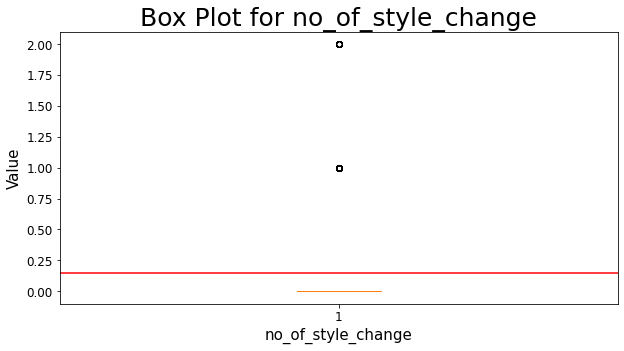

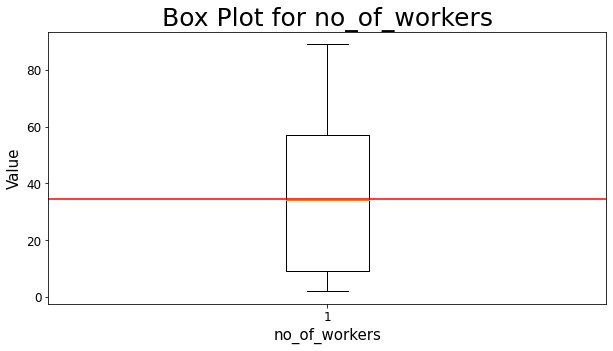

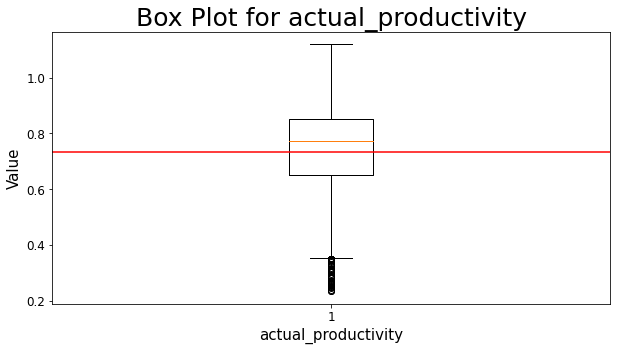

In [17]:
for column in continuous:
    plot_boxplot(data, column, title='Box Plot for {}'.format(column))

Box plots confirmed that there are some extreme outliers in `wip`, `incentive`, `idle_time`, `idle_men` columns. The rest of the data features also have outliers but are not nearly as extreme as the ones in the four previously mentioned columns.

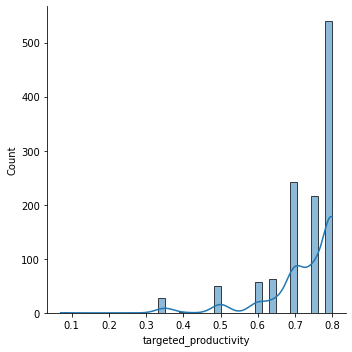

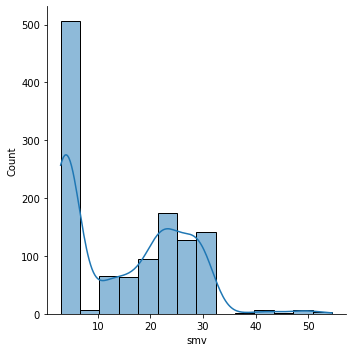

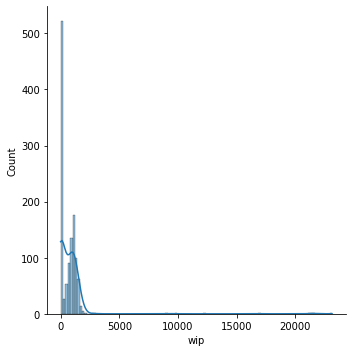

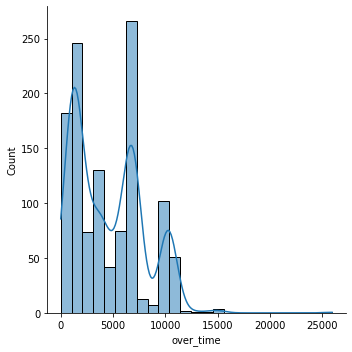

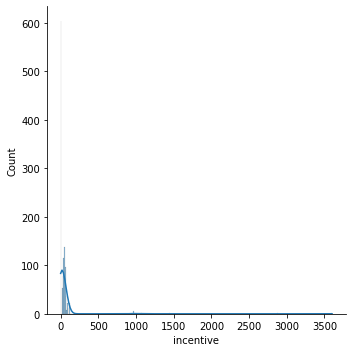

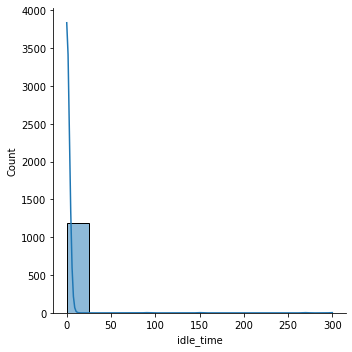

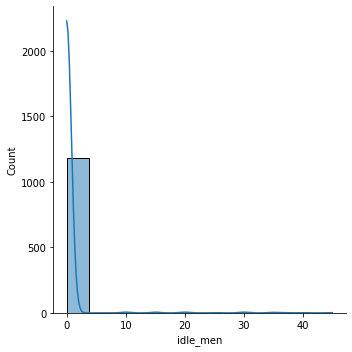

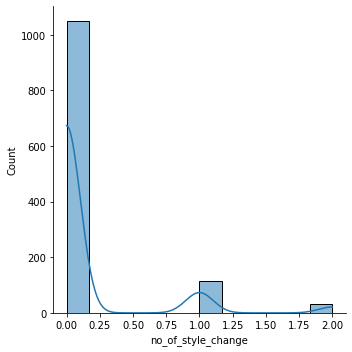

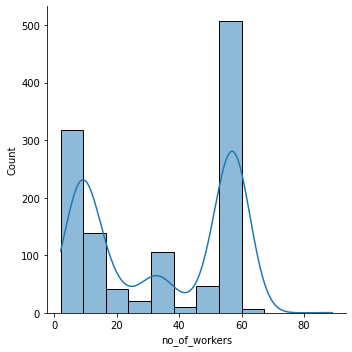

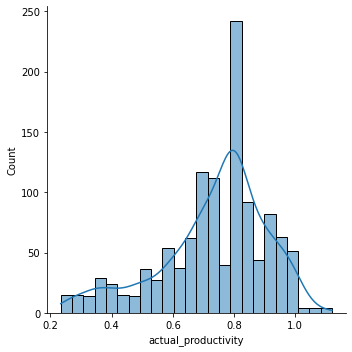

In [18]:
for cont in continuous:
    sns.displot(data=data, x=cont, kde=True)

From the data distribution it can be seen that the output varaible is distributed normally. The observations that we had from the box plots about the outliers are once again confirmed.

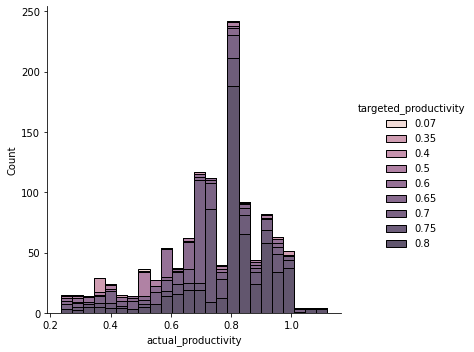

In [19]:
sns.displot(data=data, x="actual_productivity", hue="targeted_productivity", multiple="stack")

## Data cleaniong and feature extraction

Reduce dataset size

In [20]:
data = reduce_mem_usage(data)

Reducing for targeted_productivity
Reducing for smv
Reducing for wip
Reducing for over_time
Reducing for incentive
Reducing for idle_time
Reducing for no_of_workers
Reducing for actual_productivity
Mem. usage decreased to  0.06 Mb (0.0% reduction)


As productivity cannot exceed 0, all the values that are greater than 1 will be made 1.

In [21]:
data.loc[data['actual_productivity']>1, 'actual_productivity'] = 1

In [22]:
data.loc[data['targeted_productivity']>1, 'targeted_productivity'] = 1

In [23]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.799805,26.156250,1108.0,7080,98,0.0,0,0,59.0,0.940918
1,1/1/2015,Quarter1,finishing,Thursday,1,0.750000,3.939453,0.0,960,0,0.0,0,0,8.0,0.886719
2,1/1/2015,Quarter1,sweing,Thursday,11,0.799805,11.406250,968.0,3660,50,0.0,0,0,30.5,0.800781
3,1/1/2015,Quarter1,sweing,Thursday,12,0.799805,11.406250,968.0,3660,50,0.0,0,0,30.5,0.800781
4,1/1/2015,Quarter1,sweing,Thursday,6,0.799805,25.906250,1170.0,1920,50,0.0,0,0,56.0,0.800293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.750000,2.900391,0.0,960,0,0.0,0,0,8.0,0.628418
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.700195,3.900391,0.0,960,0,0.0,0,0,8.0,0.625488
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.649902,3.900391,0.0,960,0,0.0,0,0,8.0,0.625488
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.750000,2.900391,0.0,1800,0,0.0,0,0,15.0,0.505859


Now we will produce the correlation matrix so we can drop the coupled features (correlation>0.95).

d:\uni\masters\diss\diss\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
d:\uni\masters\diss\diss\lib\site-packages\dython\nominal.py:254: RuntimeWarning: overflow encountered in power
  denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))


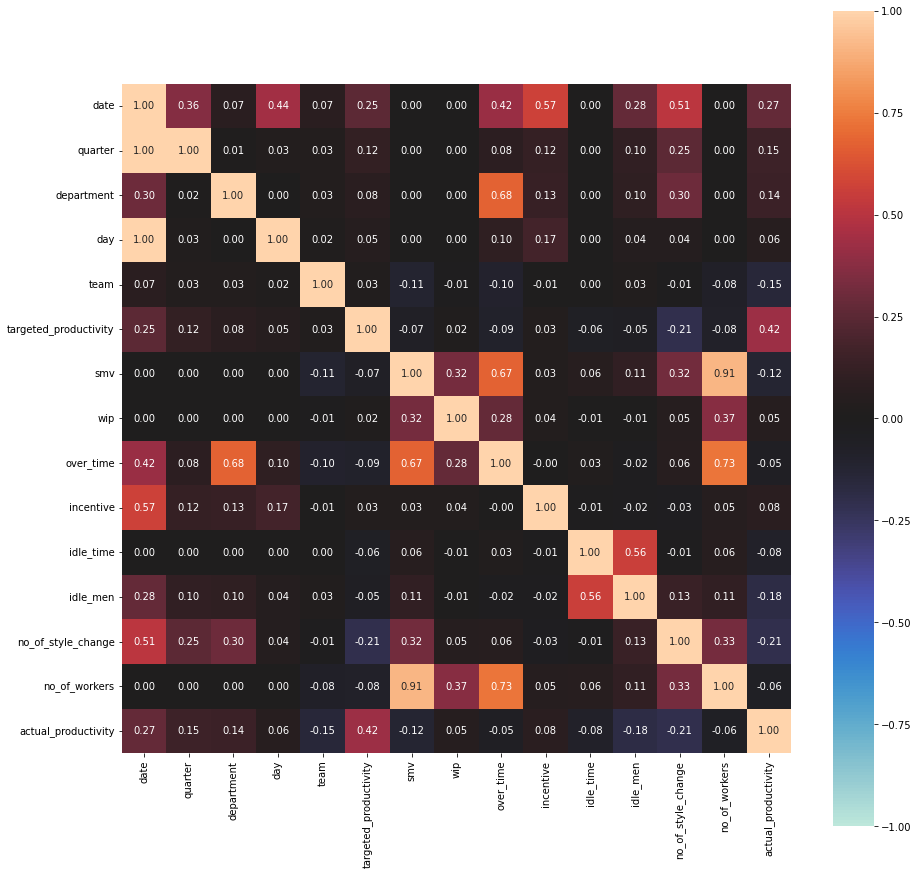

In [24]:
correlations = nominal.associations(data, nom_nom_assoc='theil', figsize=(15, 15))

Now that we have obtained the correlation matrix for this dataset, we can drop the features that are easily predictable given the value of another feature. Given that we know date, we can predict both current day of week and quarter, however date is not a commonly used feature in a time-series model, thus it can be omitted. No other feature correlates that much with another one.

### Time-related features

In [25]:
data=data.drop(['quarter', 'day'], axis=1)

In [26]:
data['date'] = pd.to_datetime(data['date'])

In [27]:
data['dow']=data['date'].dt.day_of_week
data['month']=data['date'].dt.month
data['week']=data['date'].dt.isocalendar().week

In [28]:
data

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,dow,month,week
0,2015-01-01,sweing,8,0.799805,26.156250,1108.0,7080,98,0.0,0,0,59.0,0.940918,3,1,1
1,2015-01-01,finishing,1,0.750000,3.939453,0.0,960,0,0.0,0,0,8.0,0.886719,3,1,1
2,2015-01-01,sweing,11,0.799805,11.406250,968.0,3660,50,0.0,0,0,30.5,0.800781,3,1,1
3,2015-01-01,sweing,12,0.799805,11.406250,968.0,3660,50,0.0,0,0,30.5,0.800781,3,1,1
4,2015-01-01,sweing,6,0.799805,25.906250,1170.0,1920,50,0.0,0,0,56.0,0.800293,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,finishing,10,0.750000,2.900391,0.0,960,0,0.0,0,0,8.0,0.628418,2,3,11
1193,2015-03-11,finishing,8,0.700195,3.900391,0.0,960,0,0.0,0,0,8.0,0.625488,2,3,11
1194,2015-03-11,finishing,7,0.649902,3.900391,0.0,960,0,0.0,0,0,8.0,0.625488,2,3,11
1195,2015-03-11,finishing,9,0.750000,2.900391,0.0,1800,0,0.0,0,0,15.0,0.505859,2,3,11


### Lag-related features

We will create the autocorrelation plot for each team separately for the target productivity.

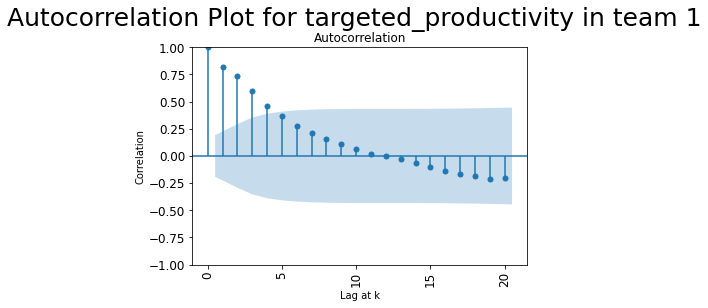

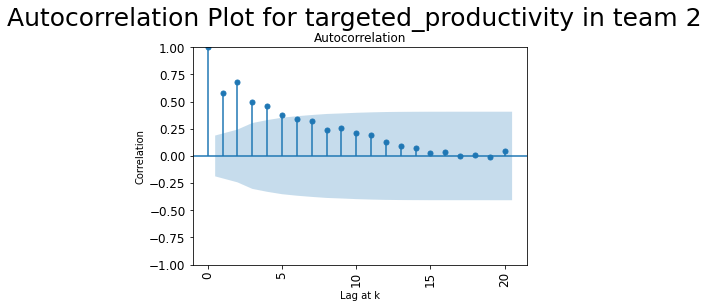

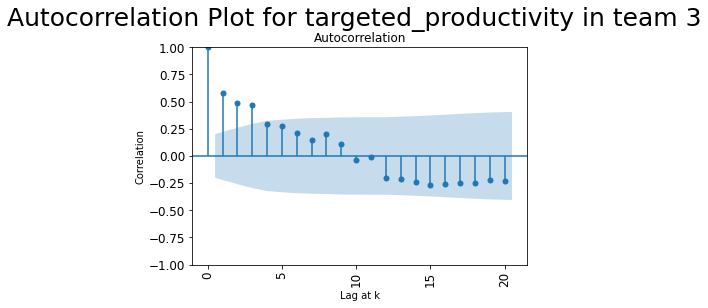

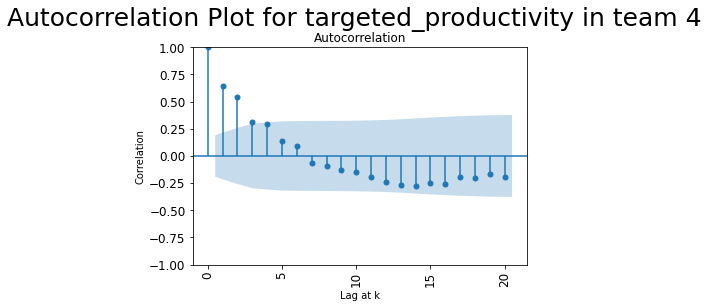

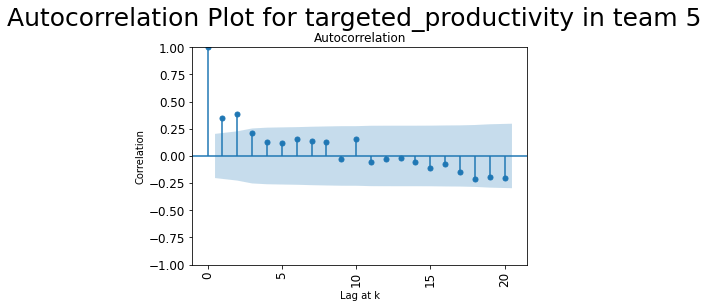

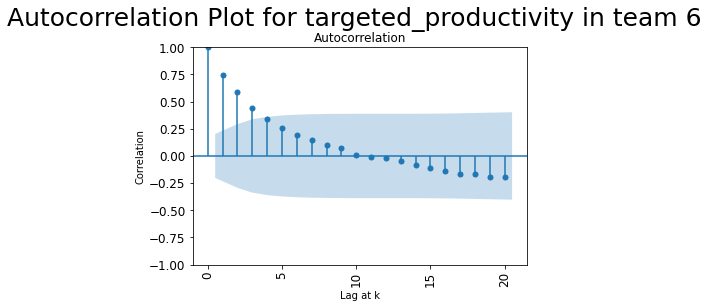

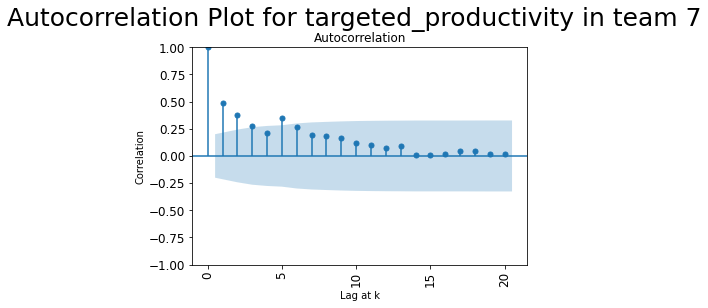

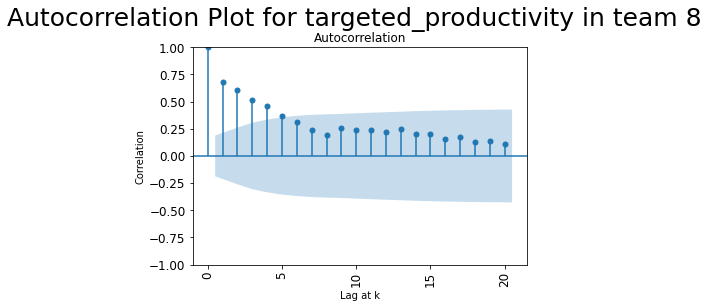

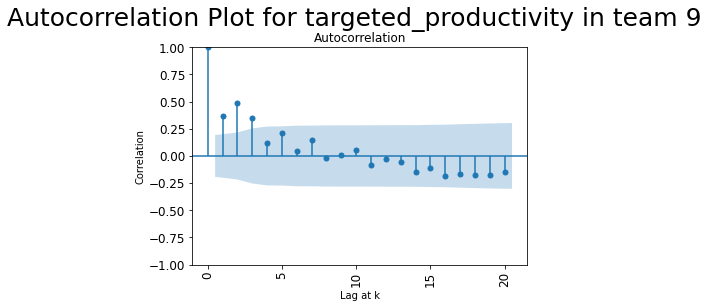

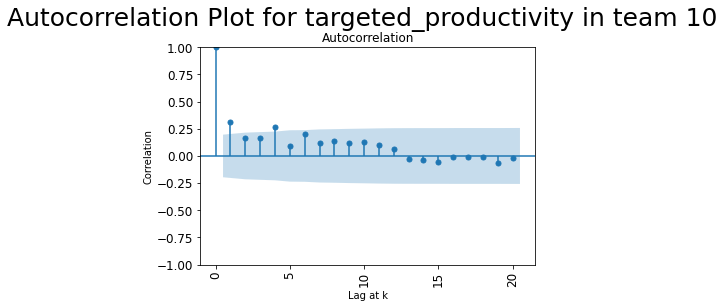

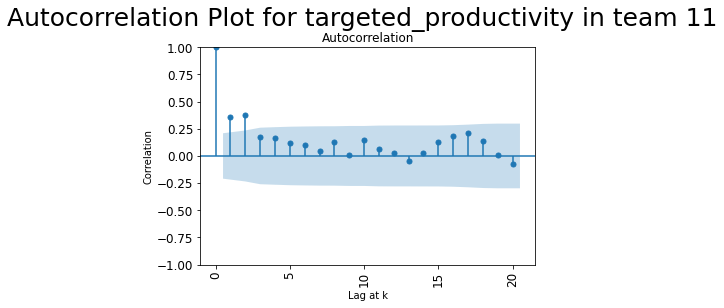

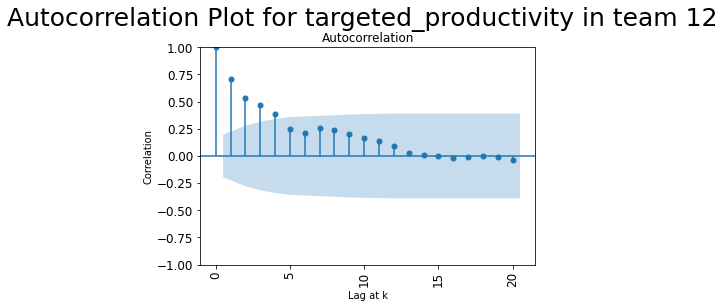

In [29]:
for team in sorted(data.team.unique()):
    autocor_plot(data, team)

Given those graphs it can be seen that the productivity of the last two days autocorrelates the most with current day productivity. Given that `lag` feature for those 2 days will be introduced

In [30]:
lag_days = [1, 2]

In [31]:
for team in data.team.unique():
    for lag_day in lag_days:
        data.loc[data['team']==team, "targeted_productivity_lag_" + str(lag_day)] = data.loc[data['team']==team, "targeted_productivity"].shift(lag_day, fill_value=0)

We can also produce the mean values for some period of time to smooth out the input values.

In [33]:
mean_days = lag_days
for mean_day in mean_days :
    for lag_day in lag_days:
        data[f"targeted_productivity_rmean_{lag_day}_{mean_day}"] = data[["team", f'targeted_productivity_lag_{lag_day}']].groupby("team")[f'targeted_productivity_lag_{lag_day}'].transform(lambda x : x.rolling(mean_day).mean()).fillna(0)

---------

The same thing will be done for actual probability

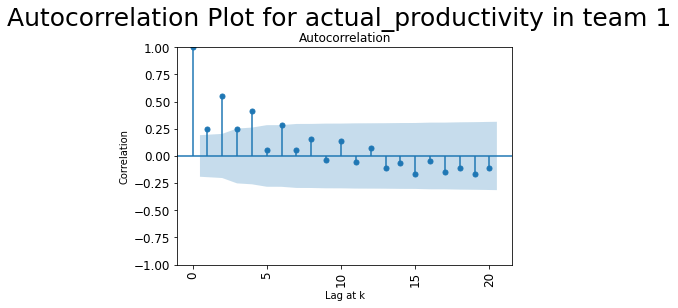

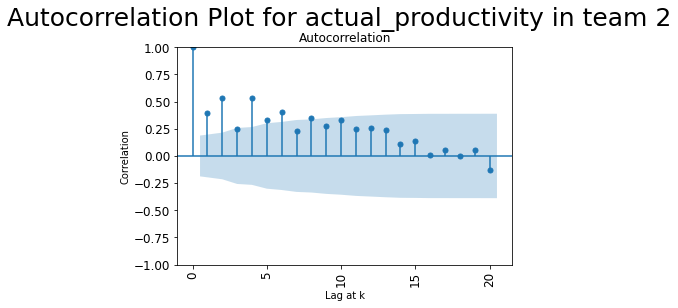

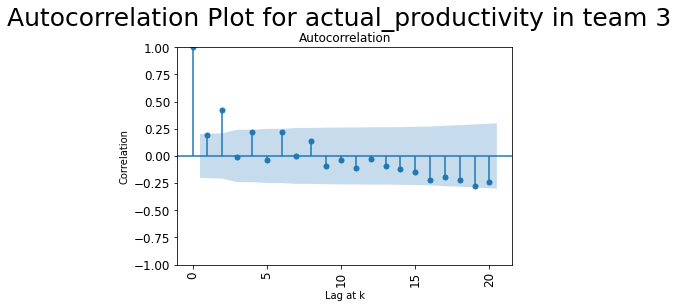

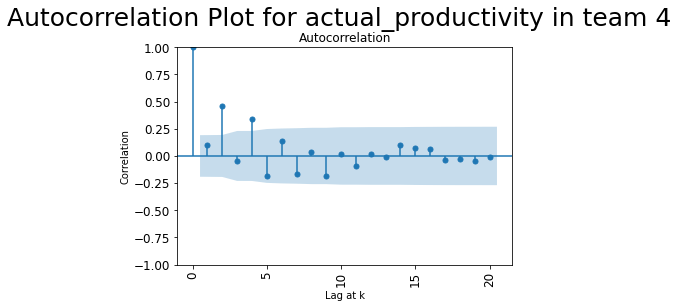

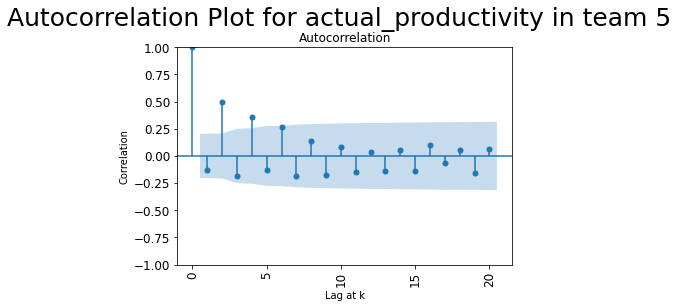

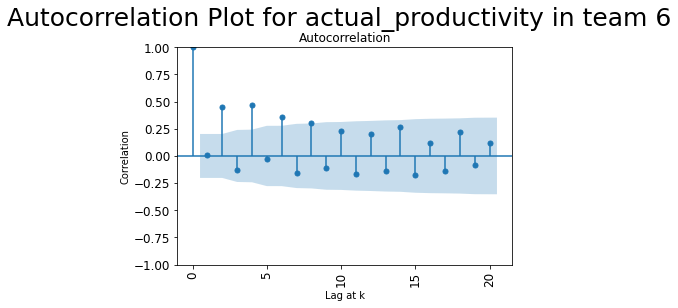

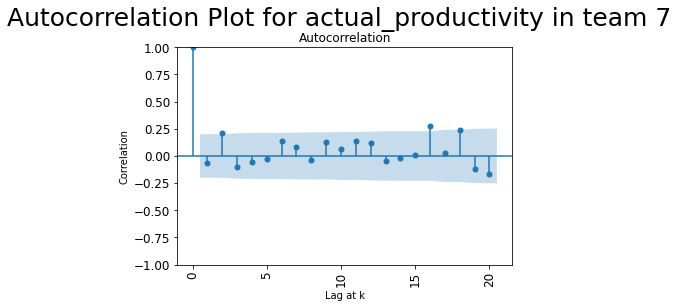

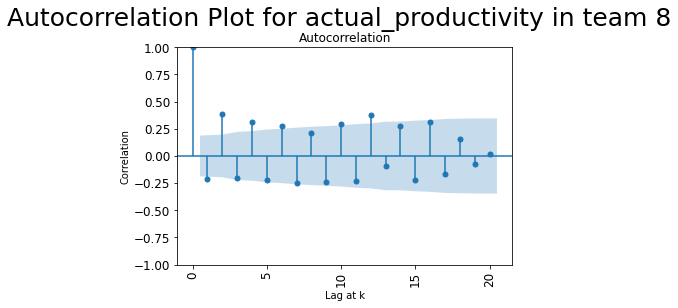

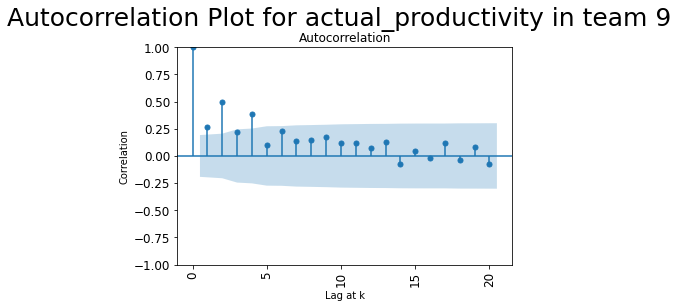

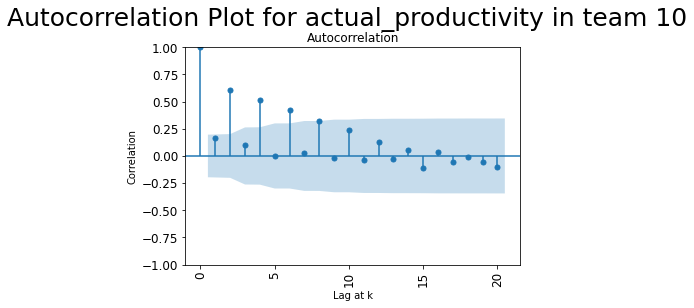

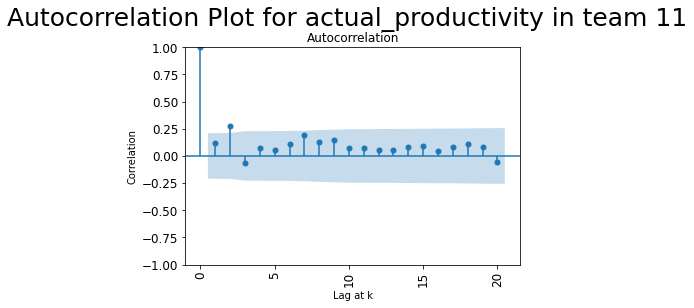

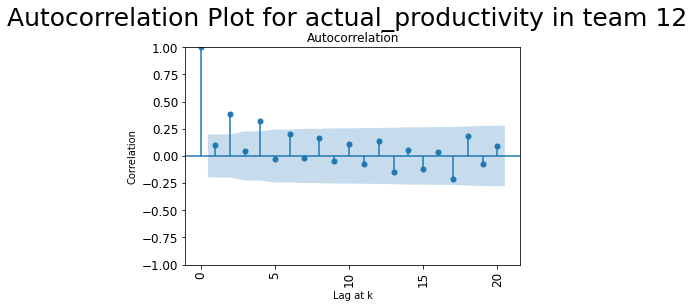

In [34]:
for team in sorted(data.team.unique()):
    autocor_plot(data, team, productivity='actual_productivity')

From the above graph, it can be seen that 2nd and 4th days produce the highest autocorrelation, therefore including them will most likely increase the model's predictive power.

In [35]:
lag_days = [2, 4]

In [36]:
for team in data.team.unique():
    for lag_day in lag_days:
        data.loc[data['team']==team, "actual_productivity_lag_" + str(lag_day)] = data.loc[data['team']==team, "actual_productivity"].shift(lag_day, fill_value=0)

In [37]:
means = lag_days
for mean_day in mean_days :
    for lag_day in lag_days:
        data[f"actual_productivity_rmean_{lag_day}_{mean_day}"] = data[["team", f'actual_productivity_lag_{lag_day}']].groupby("team")[f'actual_productivity_lag_{lag_day}'].transform(lambda x : x.rolling(mean_day).mean()).fillna(0)

-----

In [38]:
data

,date,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,targeted_productivity_rmean_1_1,targeted_productivity_rmean_2_1,targeted_productivity_rmean_1_2,targeted_productivity_rmean_2_2,actual_productivity_lag_2,actual_productivity_lag_4,actual_productivity_rmean_2_1,actual_productivity_rmean_4_1,actual_productivity_rmean_2_2,actual_productivity_rmean_4_2
0,2015-01-01,sweing,8,0.799805,26.156250,1108.0,7080,98,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-01-01,finishing,1,0.750000,3.939453,0.0,960,0,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2015-01-01,sweing,11,0.799805,11.406250,968.0,3660,50,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-01-01,sweing,12,0.799805,11.406250,968.0,3660,50,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2015-01-01,sweing,6,0.799805,25.906250,1170.0,1920,50,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,finishing,10,0.750000,2.900391,0.0,960,0,0.0,0,...,0.750000,0.700195,0.725098,0.725098,0.398682,0.477295,0.398682,0.477295,0.574585,0.588745
1193,2015-03-11,finishing,8,0.700195,3.900391,0.0,960,0,0.0,0,...,0.700195,0.649902,0.675049,0.675049,0.560547,0.264160,0.560547,0.264160,0.630615,0.457275
1194,2015-03-11,finishing,7,0.649902,3.900391,0.0,960,0,0.0,0,...,0.649902,0.500000,0.574951,0.550049,0.560547,0.500488,0.560547,0.500488,0.595459,0.663086
1195,2015-03-11,finishing,9,0.750000,2.900391,0.0,1800,0,0.0,0,...,0.750000,0.750000,0.750000,0.750000,0.750488,0.750488,0.750488,0.750488,0.786133,0.795654


Reduce the data size to avoid overflow

In [39]:
data = reduce_mem_usage(data)

Reducing for targeted_productivity
Reducing for smv
Reducing for wip
Reducing for over_time
Reducing for incentive
Reducing for idle_time
Reducing for no_of_workers
Reducing for actual_productivity
Reducing for dow
Reducing for month
Reducing for targeted_productivity_lag_1
Reducing for targeted_productivity_lag_2
Reducing for targeted_productivity_rmean_1_1
Reducing for targeted_productivity_rmean_2_1
Reducing for targeted_productivity_rmean_1_2
Reducing for targeted_productivity_rmean_2_2
Reducing for actual_productivity_lag_2
Reducing for actual_productivity_lag_4
Reducing for actual_productivity_rmean_2_1
Reducing for actual_productivity_rmean_4_1
Reducing for actual_productivity_rmean_2_2
Reducing for actual_productivity_rmean_4_2
Mem. usage decreased to  0.08 Mb (48.4% reduction)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1197 non-null   datetime64[ns]
 1   department                       1197 non-null   object        
 2   team                             1197 non-null   int8          
 3   targeted_productivity            1197 non-null   float16       
 4   smv                              1197 non-null   float16       
 5   wip                              1197 non-null   float16       
 6   over_time                        1197 non-null   int16         
 7   incentive                        1197 non-null   int16         
 8   idle_time                        1197 non-null   float16       
 9   idle_men                         1197 non-null   int8          
 10  no_of_style_change               1197 non-null   int8       

Save the dataset

In [45]:
data.to_csv(data_dir+data_output)